In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('datos.csv', sep='|', on_bad_lines='skip', parse_dates=['datetime'], index_col='datetime')
df.head()

,K-1303_Engine_RPM,K-1303_Engine_Load_Factor,K-1303_Fuel_Gas_Pressure,K-1303_Pre_Catalyst_Temperature,K-1303_Post_Catalyst_Temperature,K-1303_Actual_Engine_Timing,K-1303_Inlet_Air_Temperature,K-1303_Fuel_Pressure_-_Absolute,K-1303_Engine_Fuel_Gas_Temperature,K-1303_Fuel_Valve_Position,...,K-1303_Suction_Screen_Differential_Pressure,K-1303_Stage_#1_Suction_Temperature,K-1303_Cylinder_#1_Temperature,K-1303_Stage_#2_Suction_Temperature,K-1303_Cylinder_#2_Temperature,K-1303_Stage_#3_Suction_Temperature,K-1303_Cylinder_#3_Temperature,K-1303_Cylinder_#4_Temperature,Train_1_Inlet_Separator_Pressure,Train_1_Sales_Pressure
datetime,,,,,,,,,,,,,,,,,,,,,
2018-08-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,111.0,NaN,NaN,NaN,NaN,NaN,NaN
2018-08-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,111.0,NaN,NaN,NaN,NaN,NaN,NaN
2018-08-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,111.0,NaN,NaN,NaN,NaN,NaN,NaN
2018-08-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,111.0,NaN,NaN,NaN,NaN,NaN,NaN
2018-08-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,111.0,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
train = df.loc['2019-09-05':'2020-09-04']

In [4]:
test = df.loc['2018-08-01':'2019-04-01']

# Exploratory Data Analysis

First let's analyze basic information about the data. We are going to see the **statistics**, the **distribution plot**, the **time series plot** and the **correlation matrix** of the variables.

Then, we are going to separate the variables by it's relevance with the motor and the compressor (see PDF with the list) and check the same plots.

In [5]:
train.shape

(8761, 59)

In [6]:
train.describe()

,K-1303_Engine_RPM,K-1303_Engine_Load_Factor,K-1303_Fuel_Gas_Pressure,K-1303_Pre_Catalyst_Temperature,K-1303_Post_Catalyst_Temperature,K-1303_Actual_Engine_Timing,K-1303_Inlet_Air_Temperature,K-1303_Fuel_Pressure_-_Absolute,K-1303_Engine_Fuel_Gas_Temperature,K-1303_Fuel_Valve_Position,...,K-1303_Suction_Screen_Differential_Pressure,K-1303_Stage_#1_Suction_Temperature,K-1303_Cylinder_#1_Temperature,K-1303_Stage_#2_Suction_Temperature,K-1303_Cylinder_#2_Temperature,K-1303_Stage_#3_Suction_Temperature,K-1303_Cylinder_#3_Temperature,K-1303_Cylinder_#4_Temperature,Train_1_Inlet_Separator_Pressure,Train_1_Sales_Pressure
count,8502.000000,8502.000000,8502.000000,8502.000000,8502.000000,8502.000000,8502.000000,8502.000000,8502.000000,8502.000000,...,8502.000000,8502.000000,8502.000000,8502.000000,8502.000000,8502.000000,8502.000000,8502.000000,8265.000000,305.000000
mean,1299.227241,75.513879,31.124053,883.274524,799.272171,26.195672,148.332322,16.783630,68.450317,38.237356,...,0.291955,52.224535,163.329687,94.034933,214.662080,92.936250,164.260997,219.615973,129.238445,1166.633326
std,229.455218,14.010608,1.480983,166.183255,154.248624,3.488657,9.827804,0.754351,16.884333,6.322016,...,0.547051,9.227460,27.169063,10.776066,44.424512,19.951834,16.237698,42.286336,7.124415,15.997491
min,0.000000,0.000000,27.299999,63.000000,0.000000,0.000000,61.520000,13.561050,35.599998,0.000000,...,0.000000,19.000000,0.000000,53.000000,-102.000000,0.000000,57.000000,0.000000,0.559280,1057.113037
25%,1256.500000,71.000000,30.299999,915.000000,831.000000,23.000000,143.240005,16.896931,57.200001,39.000000,...,0.100000,44.000000,162.000000,87.000000,216.000000,82.000000,160.000000,219.000000,127.166199,1167.349976
50%,1371.000000,80.000000,30.900000,921.000000,836.000000,27.299999,147.559998,16.969450,64.400002,40.000000,...,0.200000,52.000000,165.000000,93.000000,227.000000,93.000000,163.000000,229.000000,128.378296,1170.441040
75%,1395.000000,84.000000,31.600000,927.000000,843.000000,29.100000,152.240005,17.041969,77.000000,41.000000,...,0.200000,60.000000,176.000000,101.000000,237.000000,107.000000,174.000000,238.000000,129.973206,1173.150024
max,1430.000000,95.000000,38.299999,1043.000000,891.000000,29.700001,200.000000,17.332041,149.000000,100.000000,...,8.500000,92.000000,192.000000,128.000000,261.000000,138.000000,195.000000,268.000000,298.199799,1176.859985


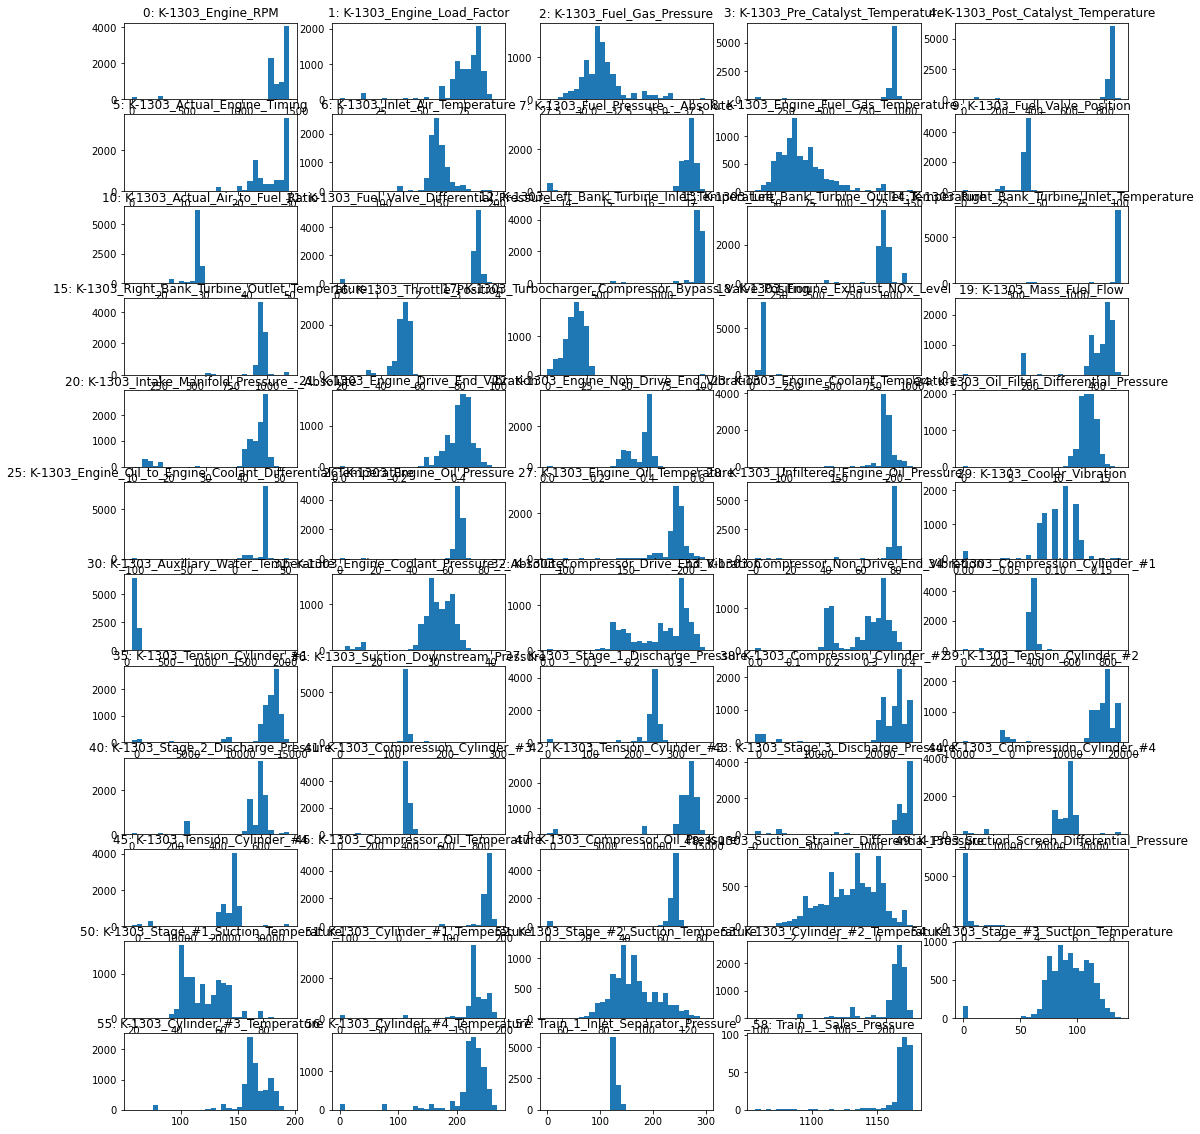

In [7]:
fig, axes = plt.subplots(12, 5, figsize=(18, 20))
for i, ax in enumerate(axes.ravel()):
    if i > 58:
        ax.set_visible(False)
        continue
    ax.hist(train.iloc[:, i], bins=30)
    ax.set_title("{}: {}".format(i, train.columns[i]))

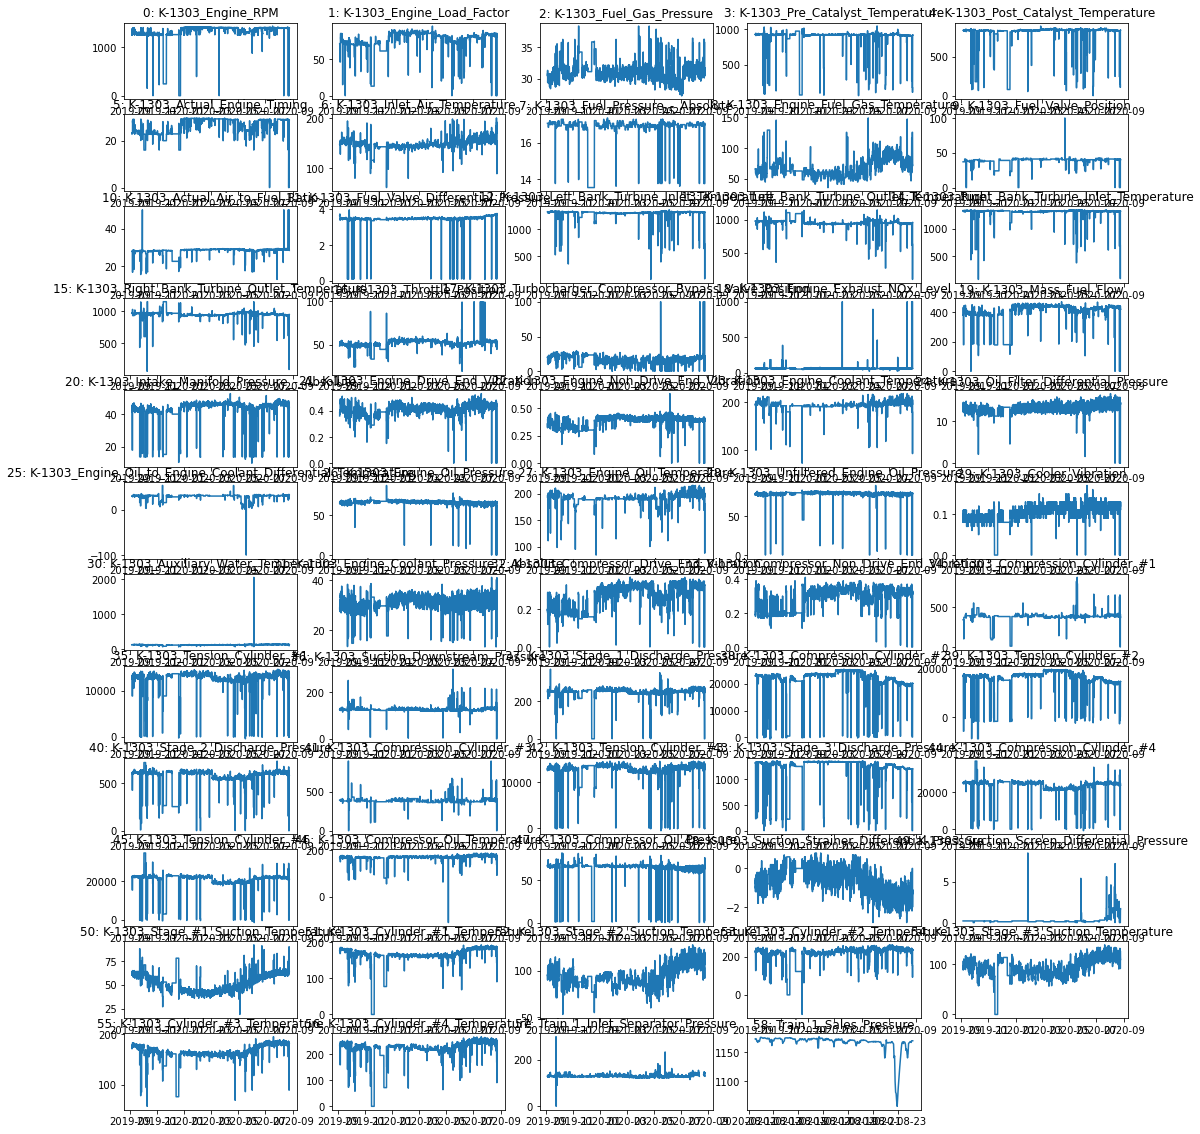

In [8]:
fig, axes = plt.subplots(12, 5, figsize=(18, 20))
for i, ax in enumerate(axes.ravel()):
    if i > 58:
        ax.set_visible(False)
        continue
    ax.plot(train.iloc[:, i])
    ax.set_title("{}: {}".format(i, train.columns[i]))

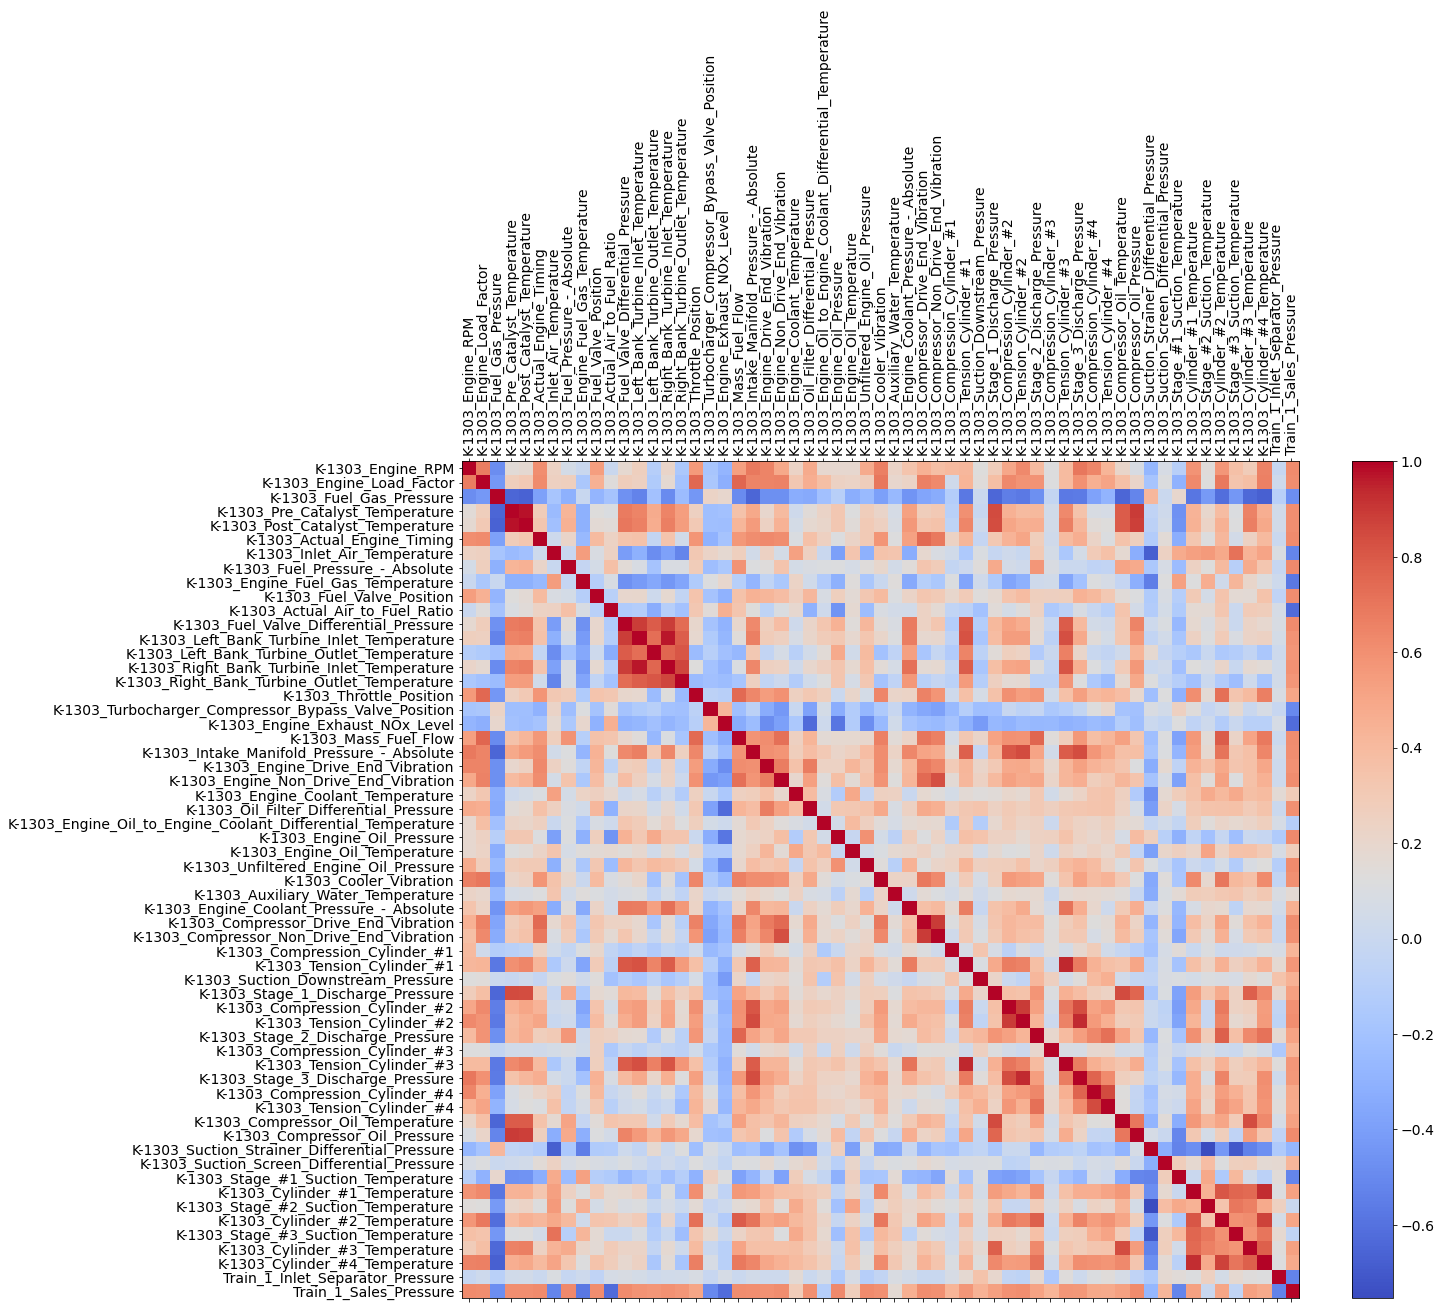

In [9]:
f = plt.figure(figsize=(19, 15))
plt.matshow(train.corr(), fignum=f.number, cmap=plt.cm.coolwarm)
plt.xticks(range(train.shape[1]), train.columns, fontsize=14, rotation=90)
plt.yticks(range(train.shape[1]), train.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

# Baseline models

## OneClass SVM

In [13]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

In [14]:
from sklearn.svm import OneClassSVM

In [15]:
sklearn.set_config(display='diagram')

In [16]:
simple = SimpleImputer()
standard = StandardScaler()
kmeans = KMeans(n_clusters=2)

In [17]:
onesvm = OneClassSVM(kernel='rbf', gamma=0.000001, nu=0.001)

In [36]:
pips = Pipeline([
    ('imputer', simple),
    ('scaler', standard),
    ('model', onesvm)
])
pips

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('model', OneClassSVM(gamma=1e-06, nu=0.001))])

In [37]:
pips.fit(train)

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('model', OneClassSVM(gamma=1e-06, nu=0.001))])

In [38]:
one_class_pred = pips.predict(test)

In [39]:
one_class_pred = pd.DataFrame(one_class_pred).set_index(test.index)

In [40]:
one_class_pred = one_class_pred.replace(1,0).replace(-1,1)

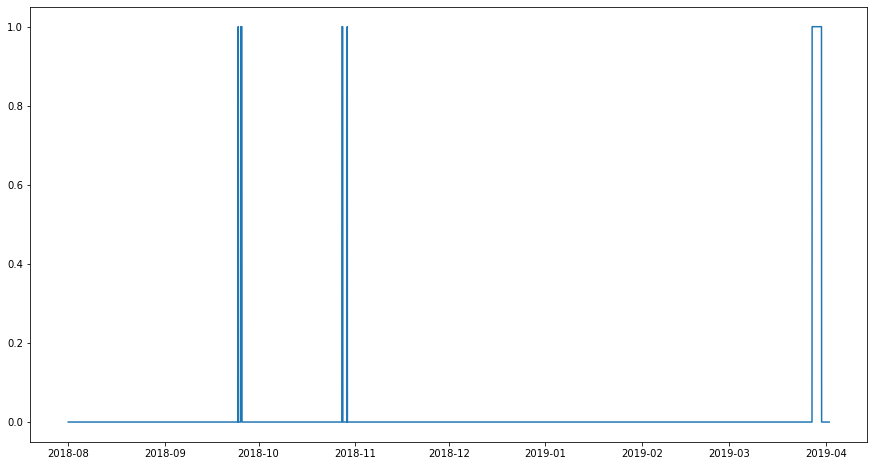

In [41]:
plt.figure(figsize=(15,8))
plt.plot(one_class_pred)

# PCA

Now we are going to applied a PCA to evaluate if we can detect the anomalies using less dimensions.

We are also going to evaluate if separating the variables for the analysis is worthy.

In [51]:
import numpy as np

In [47]:
pca_eda = PCA()

We are going to build a pipeline with a simple imputer using the median and a standard scaler previous to the PCA.

Since we are going to try to detect anomalies, it could be consider to be safe to impute de null values with the mean of the variable, since almost all of them behave like a stationary process*.

*No statistical test was applied yet.

In [48]:
pca_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('pca', pca_eda)
])
pca_pipeline

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()), ('pca', PCA())])

In [56]:
pc_train = pd.DataFrame(pca_pipeline.fit_transform(train))
pc_train.head()

,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,58
0,0.009903,-0.156238,1.781616,-1.353670,0.407227,-1.697588,-0.355127,0.235167,-0.314615,-0.669281,...,0.066762,0.182483,0.102404,-0.086054,-0.054864,-0.068237,0.046250,-0.030455,0.054041,0.004490
1,0.054171,-0.323809,1.549530,-1.316599,0.469259,-1.750147,-0.349088,0.138681,-0.339223,-0.745310,...,0.061922,0.071173,0.030480,-0.109340,-0.089205,0.064433,-0.045035,-0.034905,0.060247,-0.019579
2,0.259181,-0.375047,1.499980,-1.226098,0.649882,-1.808862,-0.429244,0.220398,-0.355061,-0.708508,...,0.123706,0.077743,0.025202,-0.123959,-0.093962,0.074157,0.040901,-0.082718,0.032110,-0.026002
3,0.130619,-0.505197,1.418998,-1.105834,0.716942,-1.711192,-0.302941,0.261165,-0.249694,-0.347568,...,0.108605,0.177076,0.069208,-0.158988,0.008919,-0.045565,0.027219,-0.096931,0.044772,-0.012834
4,0.308417,-0.575133,1.354685,-1.163715,0.580864,-1.791684,-0.317881,0.233707,-0.435530,-0.383780,...,0.058148,0.157997,0.082196,-0.109344,-0.048550,-0.024569,0.007339,-0.075977,0.045769,-0.029418


In [57]:
var = pd.DataFrame(pca_eda.explained_variance_ratio_)
pca_cum = np.cumsum(var)

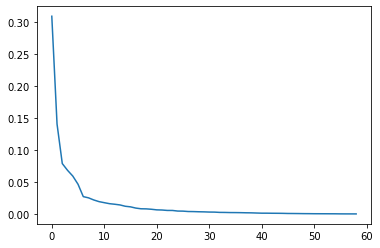

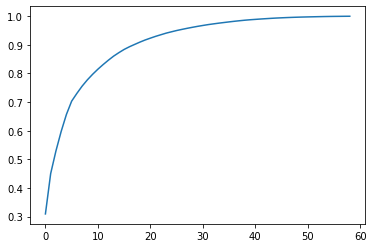

In [58]:
plt.plot(var)

plt.show()

plt.plot(pca_cum)

In [70]:
pca_cum.head(11)

,0
0,0.309399
1,0.450176
2,0.529094
3,0.597452
4,0.656843
5,0.703401
6,0.730612
7,0.755918
8,0.777893
9,0.797282


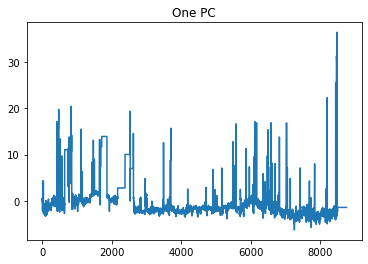

Text(0.5, 1.0, 'Two PC')

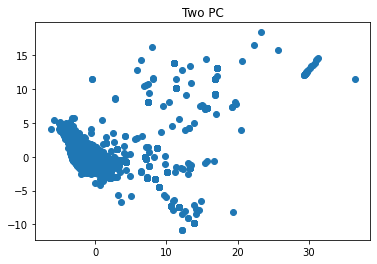

In [60]:
plt.plot(pc_motor_train[0])
plt.title('One PC')
plt.show()
plt.scatter(pc_train[0], pc_train[1])
plt.title('Two PC')

Text(0.5, 0.92, 'Three PC')

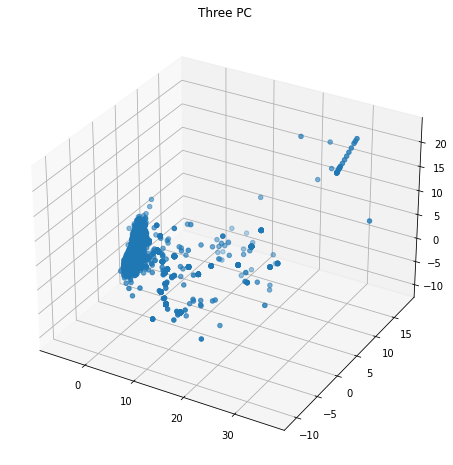

In [61]:
fig = plt.figure(figsize=(15,8))
ax = plt.axes(projection ='3d')
ax.scatter(pc_train[0], pc_train[1], pc_train[2])
plt.title('Three PC')

In [62]:
pc_test = pd.DataFrame(pca_pipeline.fit_transform(test))
pc_test.head()

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,-1.310023,-0.800479,-0.221163,0.189905,0.059577,0.12313,-0.14666,0.039373,0.19115,-0.173709,...,0.066501,-0.021562,-0.163044,-0.027248,0.098336,-0.027179,-0.086376,-0.081116,0.022024,0.037268
1,-1.310023,-0.800479,-0.221163,0.189905,0.059577,0.12313,-0.14666,0.039373,0.19115,-0.173709,...,0.066501,-0.021562,-0.163044,-0.027248,0.098336,-0.027179,-0.086376,-0.081116,0.022024,0.037268
2,-1.310023,-0.800479,-0.221163,0.189905,0.059577,0.12313,-0.14666,0.039373,0.19115,-0.173709,...,0.066501,-0.021562,-0.163044,-0.027248,0.098336,-0.027179,-0.086376,-0.081116,0.022024,0.037268
3,-1.310023,-0.800479,-0.221163,0.189905,0.059577,0.12313,-0.14666,0.039373,0.19115,-0.173709,...,0.066501,-0.021562,-0.163044,-0.027248,0.098336,-0.027179,-0.086376,-0.081116,0.022024,0.037268
4,-1.310023,-0.800479,-0.221163,0.189905,0.059577,0.12313,-0.14666,0.039373,0.19115,-0.173709,...,0.066501,-0.021562,-0.163044,-0.027248,0.098336,-0.027179,-0.086376,-0.081116,0.022024,0.037268


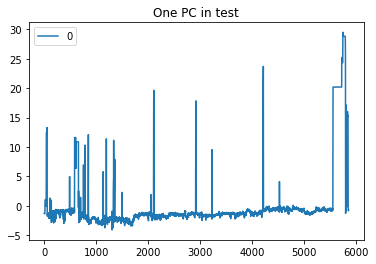

Text(0.5, 1.0, 'Two PC')

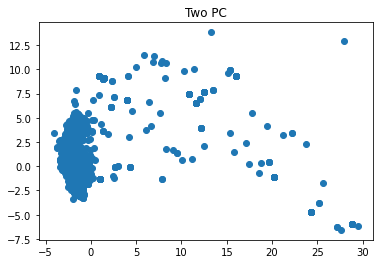

In [91]:
pc1_test = pc_test[0].to_frame()
pc1_test.plot()
plt.title('One PC in test')
plt.show()
plt.scatter(pc_test[0], pc_test[1])
plt.title('Two PC')

Text(0.5, 0.92, 'Three PC')

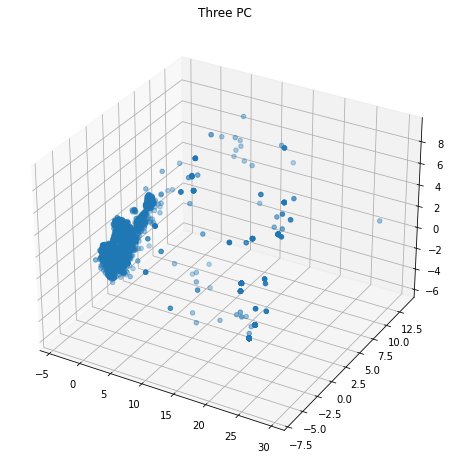

In [92]:
fig = plt.figure(figsize=(15,8))
ax = plt.axes(projection ='3d')
ax.scatter(pc_test[0], pc_test[1], pc_test[2])
plt.title('Three PC')

In [65]:
from sklearn.preprocessing import MinMaxScaler

In [95]:
pc1_test = pd.DataFrame(MinMaxScaler().fit_transform(pc1_test)).set_index(test.index)

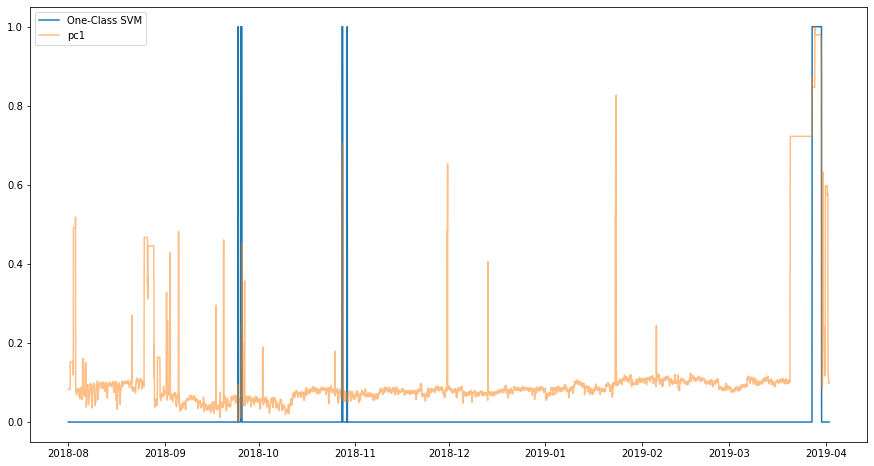

In [96]:
plt.figure(figsize=(15,8))
plt.plot(one_class_pred[0], label='One-Class SVM')
plt.plot(pc1_test, label='pc1', alpha=0.5)
plt.legend()

## One-Class SVM with PCA

In [72]:
pca_one_class = Pipeline([
    ('imputer', simple),
    ('scaler', standard),
    ('pca', PCA(n_components=10)),
    ('model', onesvm)
])
pca_one_class

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('pca', PCA(n_components=10)),
                ('model', OneClassSVM(gamma=1e-06, nu=0.001))])

In [80]:
pca_one_class_test = pd.DataFrame(pca_one_class.fit_predict(test)).replace(1,0).replace(-1,1).set_index(test.index)

## Isolation Forest

In [ ]:
from sklearn.ensemble import IsolationForest

In [106]:
clf = IsolationForest()

In [109]:
isf = Pipeline([
    ('imputer', simple),
    ('scaler', standard),
    ('pca', PCA(n_components=10)),
    ('model', clf)
])
isf

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('pca', PCA(n_components=10)), ('model', IsolationForest())])

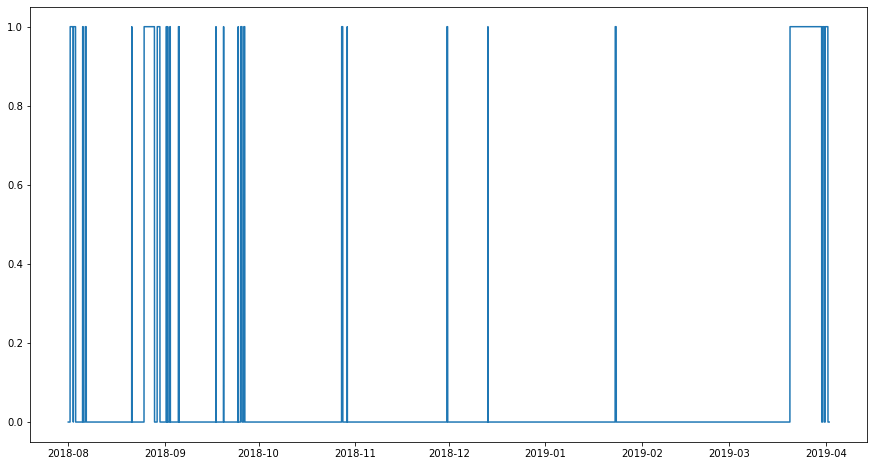

In [115]:
isf.fit(train)
y_pred_test = pd.DataFrame(isf.predict(test)).replace(1,0).replace(-1,1).set_index(test.index)
plt.figure(figsize=(15,8))
plt.plot(y_pred_test)

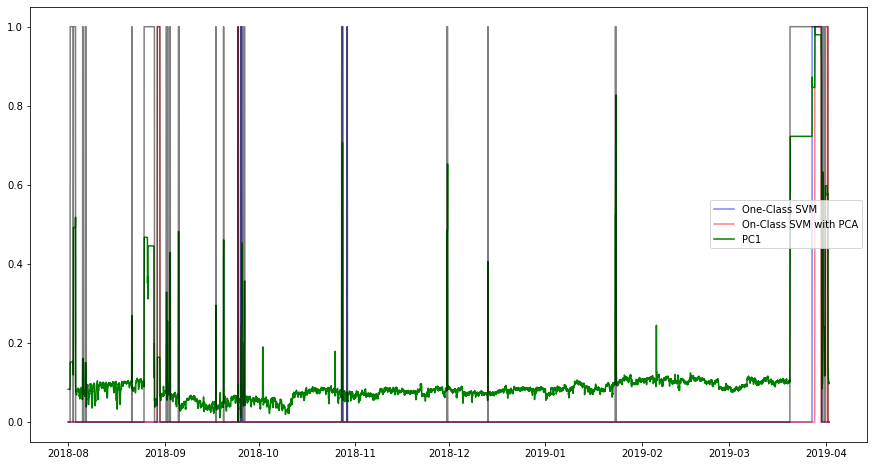

In [119]:
plt.figure(figsize=(15,8))
plt.plot(one_class_pred, color='b', label='One-Class SVM', alpha=0.5)
plt.plot(pca_one_class_test, color='r', label='On-Class SVM with PCA', alpha=0.5)
plt.plot(pc1_test, color='g', label='PC1')
plt.plot(y_pred_test, color='black', alpha=0.5)
plt.legend()